# Unit 5 - Financial Planning


In [5]:
!pip install alpaca_trade_api

In [15]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [23]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [17]:
# Set current amount of crypto assets
# YOUR CODE HERE!
btc = 1.2
eth = 5.3

In [18]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [19]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_data = requests.get(btc_url)

btc_content = btc_data.content
btc_json = btc_data.json()
btc_price = btc_json["data"]["1"]["quotes"]["USD"]["price"]
# Fetch current eth price
# YOUR CODE HERE!]
eth_data = requests.get(eth_url)

eth_content = eth_data.content
eth_json = eth_data.json()
eth_price = eth_json["data"]["1027"]["quotes"]["USD"]["price"]

In [22]:
# Compute current value of my crpto
# YOUR CODE HERE!
crypto = btc_price + eth_price
# Print current crypto wallet balance
print(f"The current valuation of your {btc} BTC is ${btc_price * btc}")
print(f"The current valuation of your {eth} eth is ${eth_price * eth}")
print(f"The current valuation of your crypto holdings is ${crypto}!")

The current valuation of your 1.2 BTC is $27411.6
The current valuation of your 5.3 eth is $3433.9759999999997
The current valuation of your crypto holdings is $23490.92!


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [24]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("APCA_API_KEY")
alpaca_secret_key = os.getenv("APCA_API_SECRET_KEY")
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [13]:
# Current amount of shares
# YOUR CODE HERE!
agg = 200
spy = 50

In [25]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2020-10-13", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start= today,
    end = today
).df
# Preview DataFrame
# YOUR CODE HERE!
portfolio

AGG                                        SPY  \
                          open    high       low   close   volume    open   
2020-10-13 00:00:00-04:00  118  118.06  117.9294  118.01  3101197  352.16   

                                                               
                               high     low   close    volume  
2020-10-13 00:00:00-04:00  352.4651  349.09  350.15  61479085

In [26]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
closing_prices = pd.DataFrame()
closing_prices["AGG"] = portfolio["AGG"]["close"]
closing_prices["SPY"] = portfolio["SPY"]["close"]

closing_prices.index = closing_prices.index.date

closing_prices

,AGG,SPY
2020-10-13,118.01,350.15


In [27]:
agg_close = closing_prices["AGG"][0]
spy_close = closing_prices["SPY"][0]

In [28]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close}")
print(f"Current SPY closing price: ${spy_close}")

Current AGG closing price: $118.01
Current SPY closing price: $350.15


In [29]:
# Compute the current value of shares
# YOUR CODE HERE!
cv_shares = (my_spy * spy_close) + (my_agg * agg_close)
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy * spy_close}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg * agg_close}")
print(f"The total value of your shares are ${cv_shares}!")

The current value of your 50 SPY shares is $17507.5
The current value of your 200 AGG shares is $23602.0
The total value of your shares are $41109.5!


### Savings Health Analysis

In [30]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Create savings DataFrame
# YOUR CODE HERE!
savings_df = pd.DataFrame([cv_crypto, cv_shares])
investment = ["crypto", "shares"]
savings_df["investment"] = investment
savings_df = savings_df.rename(columns= {0 : "amount"})
savings_df = savings_df.set_index("investment")

# Display savings DataFrame
display(savings_df)

,amount
investment,
crypto,23490.92
shares,41109.50


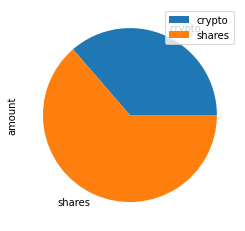

In [31]:
# Plot savings pie chart
# YOUR CODE HERE!
plot = savings_df.plot.pie(y="amount",x=" ")

In [32]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = cv_crypto + cv_shares
# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print("Congrats! You have enough money in your emergency fund")
else:
    print("Uh-oh, you need to start saving!")

Congrats! You have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [33]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
timeframe = "1D"
start_date_retirement = pd.Timestamp('2015-10-14', tz='America/New_York').isoformat()
end_date_retirment = pd.Timestamp('2020-10-14', tz='America/New_York').isoformat()

In [34]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
retirement = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date_retirement,
    end=end_date_retirment
).df
# Display sample data
retirement.head()

AGG                                         \
                             open      high       low   close     volume   
2015-10-14 00:00:00-04:00  109.83  110.0500  109.7251  110.03  3785661.0   
2015-10-15 00:00:00-04:00  109.93  110.0499  109.7900  109.89  1792325.0   
2015-10-16 00:00:00-04:00  109.90  109.9400  109.7800  109.78  1497588.0   
2015-10-19 00:00:00-04:00  109.78  109.8950  109.6500  109.85  1289942.0   
2015-10-20 00:00:00-04:00  109.64  109.7800  109.5500  109.65  1672562.0   

                              SPY                                      
                             open    high       low   close    volume  
2015-10-14 00:00:00-04:00  200.18  200.87  198.9400  199.27  82856686  
2015-10-15 00:00:00-04:00  200.08  202.34  199.6400  202.33  96008389  
2015-10-16 00:00:00-04:00  202.83  203.29  201.9200  203.14  79323870  
2015-10-19 00:00:00-04:00  202.50  203.37  202.1300  203.33  61255929  
2015-10-20 00:00:00-04:00  202.85  203.84  202.5471  203.07  60081395

In [35]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# I initially did this with 1000 simulations but it made my github push too large.
# YOUR CODE HERE!
forecast = MCSimulation(
    portfolio_data=retirement,
    weights= [cv_shares/total_savings, cv_crypto/total_savings],
    num_simulation = 100,
    num_trading_days = 252*30
)

In [36]:
# Printing the simulation input data
# YOUR CODE HERE!
forecast.portfolio_data.head()

AGG                                         \
                             open      high       low   close     volume   
2015-10-14 00:00:00-04:00  109.83  110.0500  109.7251  110.03  3785661.0   
2015-10-15 00:00:00-04:00  109.93  110.0499  109.7900  109.89  1792325.0   
2015-10-16 00:00:00-04:00  109.90  109.9400  109.7800  109.78  1497588.0   
2015-10-19 00:00:00-04:00  109.78  109.8950  109.6500  109.85  1289942.0   
2015-10-20 00:00:00-04:00  109.64  109.7800  109.5500  109.65  1672562.0   

                                           SPY                            \
                          daily_return    open    high       low   close   
2015-10-14 00:00:00-04:00          NaN  200.18  200.87  198.9400  199.27   
2015-10-15 00:00:00-04:00    -0.001272  200.08  202.34  199.6400  202.33   
2015-10-16 00:00:00-04:00    -0.001001  202.83  203.29  201.9200  203.14   
2015-10-19 00:00:00-04:00     0.000638  202.50  203.37  202.1300  203.33   
2015-10-20 00:00:00-04:00    -0.001821  202.85  203.84  202.5471  203.07   

                                                  
                             volume daily_return  
2015-10-14 00:00:00-04:00  82856686          NaN  
2015-10-15 00:00:00-04:00  96008389     0.015356  
2015-10-16 00:00:00-04:00  79323870     0.004003  
2015-10-19 00:00:00-04:00  61255929     0.000935  
2015-10-20 00:00:00-04:00  60081395    -0.001279

In [37]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
forecast.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998244,0.995870,0.990056,0.999837,1.001620,1.008869,1.004772,1.003898,0.998207,0.993708,...,0.990969,1.004351,1.000741,1.001538,0.994218,1.002354,1.008167,0.990551,0.989307,1.001643
2,0.998359,0.994856,0.996829,1.005012,1.007148,1.014147,1.009198,1.004541,1.001307,0.992928,...,0.990582,1.001874,1.001703,1.002875,0.987614,0.998995,1.009609,0.994772,0.998513,0.996649
3,1.010813,0.995138,0.996995,0.999330,1.008571,1.018590,1.009529,1.005624,0.993949,0.994522,...,0.988505,0.996963,0.995824,1.003221,0.987948,0.988159,1.020334,1.004826,0.990694,0.999311
4,1.016608,0.996313,0.990589,1.003055,1.010321,1.011080,1.001524,1.004643,0.994530,0.990442,...,0.987485,1.002039,0.996854,0.992936,0.990382,0.978917,1.021842,1.013361,0.980670,0.996003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.170550,6.787720,9.525785,4.772286,3.153642,3.108438,4.680149,9.718937,5.335009,6.244532,...,4.713155,7.386670,5.150821,5.356962,9.153527,2.846888,4.816785,6.680830,3.122644,3.114393
7557,2.166403,6.824423,9.492389,4.783895,3.163516,3.108394,4.678151,9.776223,5.328466,6.224060,...,4.738915,7.415568,5.154872,5.368238,9.095351,2.839854,4.789978,6.663206,3.125798,3.105090
7558,2.168710,6.895386,9.465265,4.781487,3.157543,3.108410,4.696947,9.790618,5.346776,6.244327,...,4.739636,7.375840,5.173502,5.340961,9.162118,2.850614,4.776225,6.619251,3.115517,3.103322
7559,2.193267,6.837048,9.412736,4.768919,3.158069,3.111386,4.686906,9.814586,5.365516,6.241313,...,4.720271,7.355420,5.171851,5.354988,9.139184,2.846918,4.764064,6.616504,3.123723,3.102539


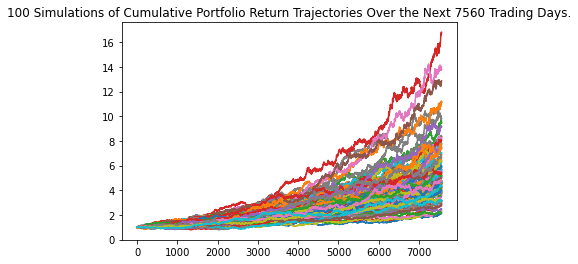

In [38]:
# Plot simulation outcomes
# YOUR CODE HERE!
forecast_plot = forecast.plot_simulation()

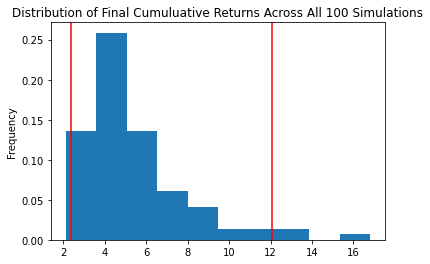

In [39]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
forecast_distribution = forecast.plot_distribution()

### Retirement Analysis

In [40]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
monte_carlo_summary = forecast.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(monte_carlo_summary)

count           100.000000
mean              5.364535
std               2.538841
min               2.115974
25%               3.828179
50%               4.652791
75%               6.027477
max              16.807895
95% CI Lower      2.379997
95% CI Upper     12.051364
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [41]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
monte_lower = round(monte_carlo_summary[8]*initial_investment, 2)
monte_upper = round(monte_carlo_summary[9]*initial_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${monte_lower} and ${monte_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $47599.94 and $241027.28


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [44]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
monte_lower = round(monte_carlo_summary[8]*initial_investment, 2)
monte_upper = round(monte_carlo_summary[9]*initial_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${monte_lower} and ${monte_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $71399.91 and $361540.93


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [47]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [48]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [49]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [50]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [51]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [52]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!



### Ten Years Retirement Option

In [53]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [54]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [55]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [56]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [57]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [58]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

